### Perform sentimental analysis on the tweets of Donald Trump
#dataset:realDonaldTrump_tweets.csv

In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

df = pd.read_csv('C:\\Users\\Raja\\Downloads\\assignments\\textmining\\realDonaldTrump_tweets.csv')
df.head()

,Unnamed: 0,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,0,2020-04-07 00:10:56,[],[],19753,None,1247315888715563015,und,None,4688,False,Twitter for iPhone,https://t.co/JIkrIczC8o,"Washington, DC",Donald J. Trump,None,None
1,1,2020-04-07 00:10:15,[],[],20889,None,1247315718217052164,und,None,5098,False,Twitter for iPhone,https://t.co/e3wBhSwDx7,"Washington, DC",Donald J. Trump,None,None
2,2,2020-04-07 00:09:52,[],[],37525,None,1247315619206266881,en,None,11772,False,Twitter for iPhone,The Wisconsin Supreme Court ruled that tomorro...,"Washington, DC",Donald J. Trump,None,None
3,3,2020-04-06 21:42:02,[],"[{'screen_name': 'WhiteHouse', 'name': 'The Wh...",0,None,1247278416195452928,en,None,5878,False,Twitter for iPhone,RT @WhiteHouse: LIVE: Press Briefing with Coro...,"Washington, DC",Donald J. Trump,None,None
4,4,2020-04-06 21:25:42,[],[],62955,None,1247274306213724160,en,None,10143,False,Twitter for iPhone,White House news conference at 5:45 P.M. Easte...,"Washington, DC",Donald J. Trump,None,None


In [2]:
df=df.drop(['time','hashtags','user_mentions','favorite_count','geo','id_str','lang','place','retweet_count','retweeted','source','location','name','time_zone','utc_offset'],axis=1)

In [3]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['text'] = df['text'].apply(cleanTxt)

# Show the cleaned tweets
df.head()

,Unnamed: 0,text
0,0,
1,1,
2,2,The Wisconsin Supreme Court ruled that tomorro...
3,3,: LIVE: Press Briefing with Coronavirus Task F...
4,4,White House news conference at 5:45 P.M. Easte...


In [4]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Unnamed: 0,text,Subjectivity,Polarity
0,0,,0.000000,0.000000
1,1,,0.000000,0.000000
2,2,The Wisconsin Supreme Court ruled that tomorro...,0.000000,0.000000
3,3,: LIVE: Press Briefing with Coronavirus Task F...,0.500000,0.136364
4,4,White House news conference at 5:45 P.M. Easte...,0.000000,0.000000
...,...,...,...,...
3198,3198,: What Pelosi wants to avoid is the outcome of...,0.100000,0.200000
3199,3199,": The impeachment vote has been recorded, but ...",0.000000,0.000000
3200,3200,This is what the Dems are dealing with. Does a...,0.600000,0.875000
3201,3201,I got Impeached last night without one Republi...,0.066667,0.000000


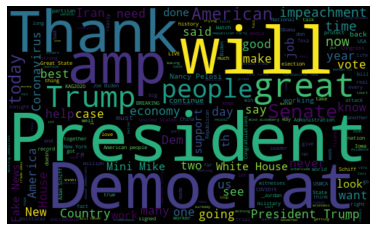

In [5]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [6]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Unnamed: 0,text,Subjectivity,Polarity,Analysis
0,0,,0.000000,0.000000,Neutral
1,1,,0.000000,0.000000,Neutral
2,2,The Wisconsin Supreme Court ruled that tomorro...,0.000000,0.000000,Neutral
3,3,: LIVE: Press Briefing with Coronavirus Task F...,0.500000,0.136364,Positive
4,4,White House news conference at 5:45 P.M. Easte...,0.000000,0.000000,Neutral
...,...,...,...,...,...
3198,3198,: What Pelosi wants to avoid is the outcome of...,0.100000,0.200000,Positive
3199,3199,": The impeachment vote has been recorded, but ...",0.000000,0.000000,Neutral
3200,3200,This is what the Dems are dealing with. Does a...,0.600000,0.875000,Positive
3201,3201,I got Impeached last night without one Republi...,0.066667,0.000000,Neutral


In [7]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['text'][i])
    print()
    j= j+1

Printing positive tweets:

1) : LIVE: Press Briefing with Coronavirus Task Force 

2) Congratulations to State Representative Karen Whitsett of Michigan. So glad you are getting better! 

3) Joe Biden wanted the date for the Democrat National Convention moved to a later time period. Now he wants a “Virtua… 

4) : Take a look back and what the liberal media and Joe Biden said about President Trump's aggressive, early response to…

5) : BREAKING: Coronavirus Outbreak. Good news on multiple fronts

US today now at 23,373, yesterday at this time was 30,571.…

6) : So dumbfounded that the Democrats would rather revert to subpoenas than find solutions to the unprecedented crisis we are wo…

7) : I don't know anyone in the last three years who has done more to help Vladimir Putin and Russia with their efforts to sow…

8) LIGHT AT THE END OF THE TUNNEL!

9) USA STRONG!

10) We are learning much about the Invisible Enemy. It is tough and smart, but we are tougher and smarter!

11) : . said "Pre

627) : Arizona is BOOMING thanks to President . Unemployment is falling &amp; labor force participation is rising!

✅239…

628) : A billionaire is definitely winning this DemDebate. 

It’s . 

629) This is the REAL Mini Mike. He admitted, many times, that he is “a fan of Donald Trump. He’s a New York ICON.” Than… 

630) A beautiful evening in Phoenix, Arizona with Great American Patriots. THANK YOU! 

631) Wow! 

632) ....for the wonderful job he has done, and we look forward to working with him closely, perhaps in another capacity… 

633) I am pleased to announce that our highly respected Ambassador to Germany, , will become the Acting D… 

634) : Here is the line for the Trump Rally in Phoenix tonight!

HUGE!

TrumpRallyPhoenix 

635) : WOW! President  is departing Bakersfield, California for Phoenix, Arizona — now! 

TrumpRallyPhoenix KAG2…

636) : LIVE: President  Delivers Remarks on Water Accessibility 

637) Rod Blagojevich did not sell the Senate seat. He served 8 years in priso

960) : Not mentioned: Bolton was never seriously considered for any position in the Trump admin that required senate confirmat…

961) : Great news for farmers, ranchers, and small business owners!  continues to cut red tape, keeping his promise to protec…

962) : Ernst: New trade deals are big wins for Iowa exporters 

963) : The Trump Administration’s new WOTUS corrects the egregious overreach of the Obama-era rule. I joined  to disc…

964) Thank you to Chuck &amp; all. USMCA is going to be GREAT! 

965) : As an appropriator and chairman of the Transportation and Infrastructure Subcommittee on , I’m proud to work with sta…

966) A full &amp; complete Endorsement for , who is doing a great job. Strong on crime, loves our Military, Vets… 

967) : Looking forward to honoring  at the White House again this year. The Bison had a tremendous season winning…

968) : USMCA heading to 's desk ✅
Economy is stronger than it’s been in 50 yrs thanks in large part to having the right tax p…

969) On

In [8]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['text'][i])
    print()
    j=j+1

Printing negative tweets:

1) : Advertising in the Failing New York Times is WAY down. Washington Post is not much better. I can’t say whether this is…

2) Advertising in the Failing New York Times is WAY down. Washington Post is not much better. I can’t say whether this… 

3) Thank you Gayle. I only wish the public could fully understand how corrupt &amp; dishonest so much of our Lamestream Me… 

4) .  “To this day the establishment media have not admitted that they were wrong and the President was right.” 

5) : . said "the establishment media have not admitted that they were wrong and the president was right" for bann…

6) Corrected Fake News! 

7) 29: Absolutely sickening that the Washington Post published this puff piece glorifying a vicious anti-Semite. 

Not only did…

8) : Thank you to everyone who is saving lives by staying at home this weekend. 

I know it's tough, but if we all work togeth…

9) To all of our youth who are missing the start of their  seasons, hang in there! W

387) : This “Bolton Bombshell” from The NY Times (hardly a reliable source on   reporting) seems to have dro…

388) : Rejected Neocon, Failing NYTimes, Deep State's Last Desperate Act After  Attorneys Destroy Radical Dems, Schiff and Pel…

389) ...(Democrats said I never met) and released the military aid to Ukraine without any conditions or investigations -… 

390) : From the beginning, Democrats' impeachment sham has been marred by selective leaks to the media, a completely predetermined…

391) Reports are that basketball great Kobe Bryant and three others have been killed in a helicopter crash in California. That is terrible news!

392) : Folks: a must read thread from  breaking down the spin, misdirections, and outright lies in the Democrats…

393) Nothing done wrong, READ THE TRANSCRIPTS!

394) Sleepyeyes Chuck Todd of Meet the Corrupt Press, just had a “totally” softball interview with conman Adam Schiff, n… 

395) After having been exposed as a fraud and corrupt, can anyone, inc

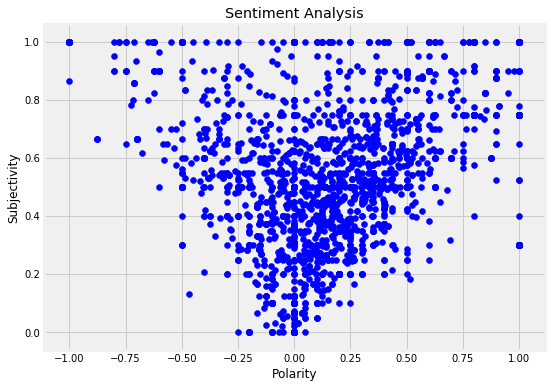

In [9]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [10]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']
ptweets
round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

44.6

In [11]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['text']
ntweets
round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

18.2

In [12]:
# Show the value counts
df['Analysis'].value_counts()

Positive    1428
Neutral     1191
Negative     584
Name: Analysis, dtype: int64

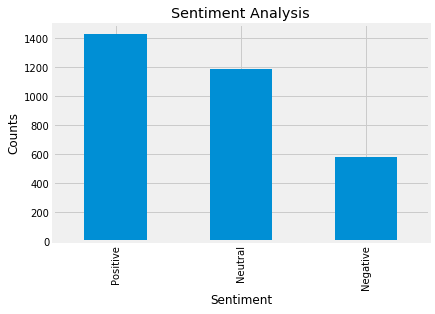

In [13]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()